###### The ICC Cricket World Cup 2023 was one of the most-attended cricket Tournament in the world. It was launched by the sport's governing body, the International Cricket Council, held every four years since 1975. In this 50 over format 10 teams participated.
##### In this article, I will try to pick the Team of the Tournament i.e. best 11 players using exploratory data analysis.The dataset that I will use can be found on the official ESPN website.

##### The team consists of 11 players which include following :
##### 5 Batsmen
##### 1 Wicket keeper batsman (included among the 5 batsmen)
##### 1 All rounder/Finisher
##### 5 Bowlers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
batting = pd.read_excel(r"C:\Users\Varun Vaidya\Desktop\CWC project\CWC batting.xlsx")
bowling = pd.read_excel(r"C:\Users\Varun Vaidya\Desktop\CWC project\CWC bowling.xlsx")
keeping = pd.read_excel(r"C:\Users\Varun Vaidya\Desktop\CWC project\CWC keeping.xlsx")
teams = pd.read_excel(r"C:\Users\Varun Vaidya\Desktop\CWC project\CWC team match.xlsx")

In [3]:
batting.head(10)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
1,RG Sharma (IND),11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
2,Q de Kock (SA),10,10,0,594,174,59.40,555,107.02,4,0,0,57,21
3,R Ravindra (NZ),10,10,1,578,123*,64.22,543,106.44,3,2,0,55,17
4,DJ Mitchell (NZ),10,9,1,552,134,69.00,497,111.06,2,2,0,48,22
5,DA Warner (AUS),11,11,0,535,163,48.63,494,108.29,2,2,0,50,24
6,SS Iyer (IND),11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24
7,KL Rahul (IND),11,10,4,452,102,75.33,498,90.76,1,2,0,38,9
8,HE van der Dussen (SA),10,10,1,448,133,49.77,530,84.52,2,2,0,39,8
9,MR Marsh (AUS),10,10,1,441,177*,49.00,410,107.56,2,1,2,43,21


In [4]:
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  146 non-null    object 
 1   Mat     146 non-null    int64  
 2   Inns    146 non-null    int64  
 3   NO      146 non-null    int64  
 4   Runs    146 non-null    int64  
 5   HS      146 non-null    object 
 6   Ave     146 non-null    float64
 7   BF      146 non-null    int64  
 8   SR      146 non-null    float64
 9   100     146 non-null    int64  
 10  50      146 non-null    int64  
 11  0       146 non-null    int64  
 12  4s      146 non-null    int64  
 13  6s      146 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 16.1+ KB


In [5]:
batting.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0,4s,6s
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,7.191781,5.993151,1.000000,160.458904,26.183493,174.342466,85.572603,0.273973,0.815068,0.417808,15.335616,4.410959
std,2.910895,2.981545,1.150712,160.351344,19.807955,162.269101,28.201063,0.679965,1.144724,0.596043,15.872022,6.093152
min,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,3.000000,0.000000,29.250000,11.807500,42.000000,70.880000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,8.000000,6.000000,1.000000,99.000000,21.515000,115.000000,84.860000,0.000000,0.000000,0.000000,8.000000,2.000000
75%,9.000000,9.000000,1.750000,279.000000,40.000000,272.000000,101.562500,0.000000,1.000000,1.000000,25.000000,5.000000
max,11.000000,11.000000,5.000000,765.000000,95.620000,847.000000,177.770000,4.000000,6.000000,2.000000,68.000000,31.000000


There have been 146 players who have batted in this tournament.

In [6]:
batting.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
4s        0
6s        0
dtype: int64

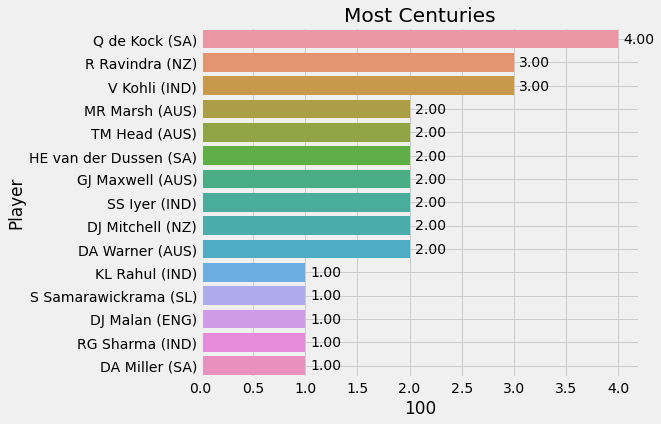

In [9]:
g = batting.groupby('Player', as_index=False)['100'].sum().sort_values(by='100', ascending=False).head(15)
plt.figure(figsize =(7,6))
ax= sns.barplot(x='100', y="Player", data=g)
#datalabels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.grid(axis = 'y')
plt.title("Most Centuries")
plt.show()

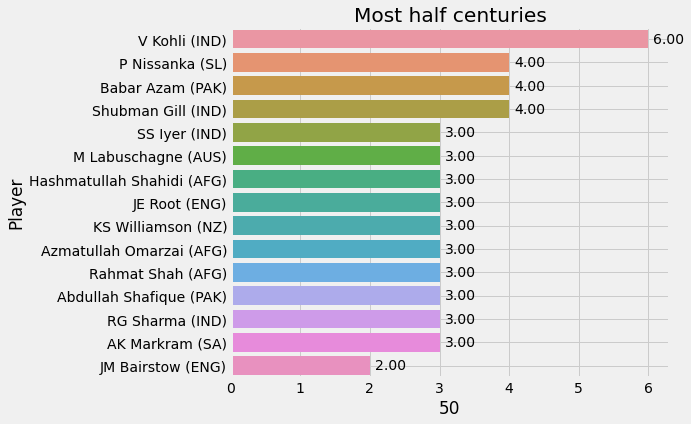

In [10]:
g = batting.groupby('Player', as_index=False)['50'].sum().sort_values(by='50', ascending=False).head(15)
plt.figure(figsize =(7,6))
ax=sns.barplot(x='50', y= 'Player', data= g)
#datalabels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    
plt.grid(axis = 'y')
plt.title("Most half centuries")
plt.style.use('fivethirtyeight')
plt.show()

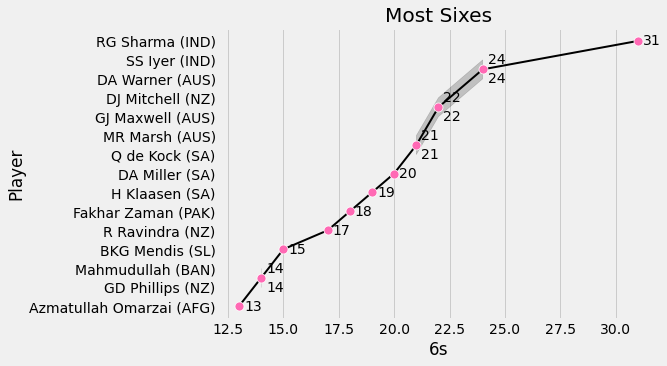

In [11]:
g = batting.groupby('Player', as_index=False)['6s'].sum().sort_values(by='6s', ascending=False).head(15)
plt.figure(figsize =(7,5))
ax=sns.lineplot(x="6s", y= 'Player', data= g, marker = 'o', ms = 9, mfc = 'hotpink',linewidth = '2', color = 'black')
#datalabels
for i, txt in enumerate(g['6s']):
    ax.annotate(txt, (g['6s'].iloc[i], g['Player'].iloc[i]), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.grid(axis = 'y')
plt.title("Most Sixes")
plt.style.use('fivethirtyeight')
plt.show()

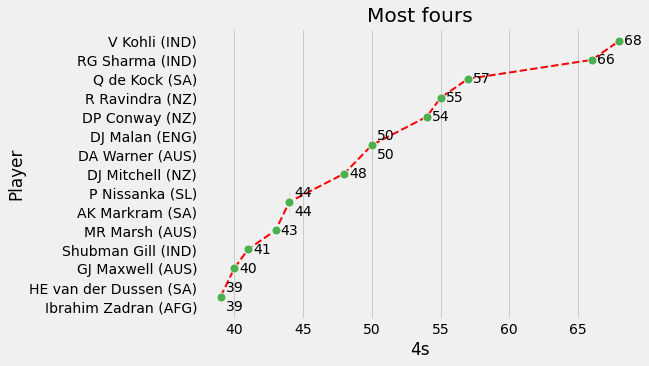

In [12]:
g = batting.groupby('Player', as_index=False)['4s'].sum().sort_values(by='4s', ascending=False).head(15)
plt.figure(figsize =(7,5))
ax = sns.lineplot(x="4s",y='Player', data= g, marker = 'o', ms = 9, mfc = '#4CAF50',linewidth = '2', linestyle = 'dashed',color = 'r')
#data label
for i, txt in enumerate(g['4s']):
    ax.annotate(txt, (g['4s'].iloc[i], g['Player'].iloc[i]), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.grid(axis = 'y')
plt.title("Most fours")
plt.style.use('fivethirtyeight')
plt.show()

### Batsmen
requirment :- balls faced > 400

In [13]:
batting = batting[batting['BF']>400]

In [14]:
batting.sort_values(by='Runs', ascending=False).head(5)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
1,RG Sharma (IND),11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
2,Q de Kock (SA),10,10,0,594,174,59.40,555,107.02,4,0,0,57,21
3,R Ravindra (NZ),10,10,1,578,123*,64.22,543,106.44,3,2,0,55,17
4,DJ Mitchell (NZ),10,9,1,552,134,69.00,497,111.06,2,2,0,48,22


In [15]:
batting.sort_values(by='Ave', ascending=False).head(5)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
7,KL Rahul (IND),11,10,4,452,102,75.33,498,90.76,1,2,0,38,9
4,DJ Mitchell (NZ),10,9,1,552,134,69.00,497,111.06,2,2,0,48,22
6,SS Iyer (IND),11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24
13,Mohammad Rizwan (PAK),9,8,2,395,131*,65.83,414,95.41,1,1,0,38,5


In [16]:
batting.sort_values(by='SR', ascending=False).head(5)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1,RG Sharma (IND),11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
6,SS Iyer (IND),11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24
4,DJ Mitchell (NZ),10,9,1,552,134,69.00,497,111.06,2,2,0,48,22
5,DA Warner (AUS),11,11,0,535,163,48.63,494,108.29,2,2,0,50,24
9,MR Marsh (AUS),10,10,1,441,177*,49.00,410,107.56,2,1,2,43,21


In [17]:
batting['Batting Points'] = batting['Runs'] + batting['SR']*2 + batting['Ave']*0.5
batting.head(10)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Batting Points
0,V Kohli (IND),11,11,3,765,117,95.62,847,90.31,3,6,1,68,9,993.430
1,RG Sharma (IND),11,11,0,597,131,54.27,474,125.94,1,3,1,66,31,876.015
2,Q de Kock (SA),10,10,0,594,174,59.40,555,107.02,4,0,0,57,21,837.740
3,R Ravindra (NZ),10,10,1,578,123*,64.22,543,106.44,3,2,0,55,17,822.990
4,DJ Mitchell (NZ),10,9,1,552,134,69.00,497,111.06,2,2,0,48,22,808.620
5,DA Warner (AUS),11,11,0,535,163,48.63,494,108.29,2,2,0,50,24,775.895
6,SS Iyer (IND),11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24,789.605
7,KL Rahul (IND),11,10,4,452,102,75.33,498,90.76,1,2,0,38,9,671.185
8,HE van der Dussen (SA),10,10,1,448,133,49.77,530,84.52,2,2,0,39,8,641.925
9,MR Marsh (AUS),10,10,1,441,177*,49.00,410,107.56,2,1,2,43,21,680.620


In [18]:
batting.sort_values(by='Batting Points', ascending=False).head(5)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Batting Points
0,V Kohli (IND),11,11,3,765,117,95.62,847,90.31,3,6,1,68,9,993.430
1,RG Sharma (IND),11,11,0,597,131,54.27,474,125.94,1,3,1,66,31,876.015
2,Q de Kock (SA),10,10,0,594,174,59.40,555,107.02,4,0,0,57,21,837.740
3,R Ravindra (NZ),10,10,1,578,123*,64.22,543,106.44,3,2,0,55,17,822.990
4,DJ Mitchell (NZ),10,9,1,552,134,69.00,497,111.06,2,2,0,48,22,808.620


### These 5 players will be our batsmen

In [19]:
keeping.head(3)

,Player,Span,Mat,Inns,Dis,Ct,St,Dis/Inn
0,Q de Kock (SA),2023-2023,10,10,20,19,1,2
1,KL Rahul (IND),2023-2023,11,11,17,16,1,1.545
2,JP Inglis (AUS),2023-2023,10,10,16,14,2,1.6


### Q deKock has the most dismisals as a wicket keeper.
#### As he is already among our 5 batsmen list,  we do not require an aditional player.

### All rounder / Finisher
#### We need a player who can come in to bat in the death overs and score at a high strike rate and who can also act as our 6th bowling option.
requirements :- Balls faced > 250
                Wickets taken > 0


In [4]:
batting2 = batting[batting['BF']>250]

In [5]:
batting2.sort_values(by='SR', ascending=False).head(3)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
12,GJ Maxwell (AUS),9,9,3,400,201*,66.66,266,150.37,2,0,1,40,22
16,H Klaasen (SA),10,10,1,373,109,41.44,280,133.21,1,1,0,28,19
24,TM Head (AUS),6,6,0,329,137,54.83,258,127.51,2,1,1,37,13


In [108]:
print('GJ Maxwell (AUS)' in bowling['Player'].unique())

True


In [109]:
bowling[bowling['Player']=='GJ Maxwell (AUS)']

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
19,GJ Maxwell (AUS),2023-2023,9,8,411,68.3,1,330,6,2/34,55.0,4.81,68.5,-,-


#### Maxwell has scored over 400 runs at a strike rate of 150 and has also taken 6 wickets with an economy of 4.81

#### This makes him a wonderful finisher and a handy 6th bowling option.

### Bowlers
requirements :- wickets > 15

In [6]:
bowling.head(10)

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5
0,A Dutt (NED),2023-2023,9,9,465,77.3,6,426,10,3/44,42.60,5.49,46.50,-,-
1,A Zampa (AUS),2023-2023,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,-
2,AAP Atkinson (ENG),2023-2023,3,3,144,24.0,-,146,4,2/45,36.50,6.08,36.00,-,-
3,AD Mathews (SL),2023-2023,5,5,133,22.1,2,107,6,2/14,17.83,4.82,22.16,-,-
4,AK Markram (SA),2023-2023,10,4,111,18.3,1,85,1,1/23,85.00,4.59,111.00,-,-
5,AL Phehlukwayo (SA),2023-2023,1,1,42,7.0,-,36,1,1/36,36.00,5.14,42.00,-,-
6,AU Rashid (ENG),2023-2023,9,9,478,79.4,1,413,15,3/42,27.53,5.18,31.86,-,-
7,Azmatullah Omarzai (AFG),2023-2023,9,9,228,38.0,1,270,7,2/52,38.57,7.10,32.57,-,-
8,BFW de Leede (NED),2023-2023,9,8,402,67.0,-,487,16,4/62,30.43,7.26,25.12,1,-
9,CAK Rajitha (SL),2023-2023,6,6,294,49.0,1,336,8,4/50,42.00,6.85,36.75,1,-


In [111]:
bowling = bowling[bowling['Wkts']>15]

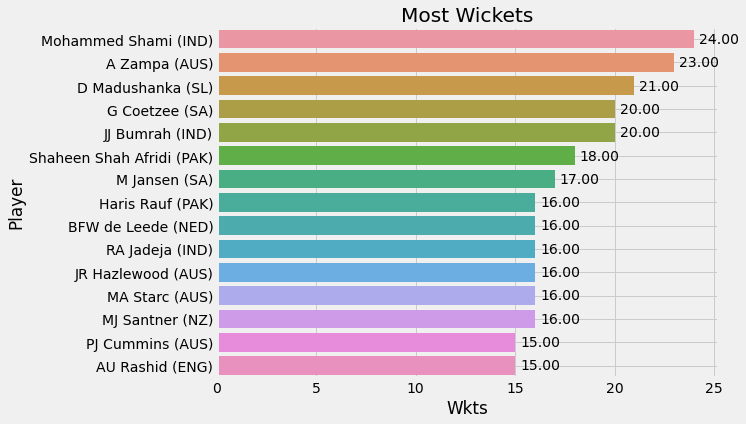

In [8]:
g = bowling.groupby('Player', as_index=False)['Wkts'].sum().sort_values(by='Wkts', ascending=False).head(15)
plt.figure(figsize =(8,6))
ax=sns.barplot(x='Wkts', y="Player", data=g)
plt.grid(axis = 'y')
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
    
plt.title("Most Wickets")
plt.style.use('fivethirtyeight')
plt.show()

In [9]:
bowling['Points'] = bowling['Wkts']*3 - bowling['Ave']*0.2 - bowling['Econ']*0.2 - bowling['SR']*0.2

In [10]:
bowling.sort_values(by='Points', ascending=False).head(5)

,Player,Span,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Points
50,Mohammed Shami (IND),2023-2023,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3,66.368
1,A Zampa (AUS),2023-2023,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,-,58.442
13,D Madushanka (SL),2023-2023,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1,52.184
17,G Coetzee (SA),2023-2023,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,-,50.984
27,JJ Bumrah (IND),2023-2023,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,-,49.948


### These 5 players will be our bowlers

# **Team Of The Tournament :-**


1. Rohit Sharma(c)
2. Q deKock(wk)
3. Virat Kohli
4. R Ravindra
5. DJ Mitchell
6. G MAxwell
7. M Shami
8. J bumrah
9. A Zampa
10. D Madushanka
11. G Coetzee

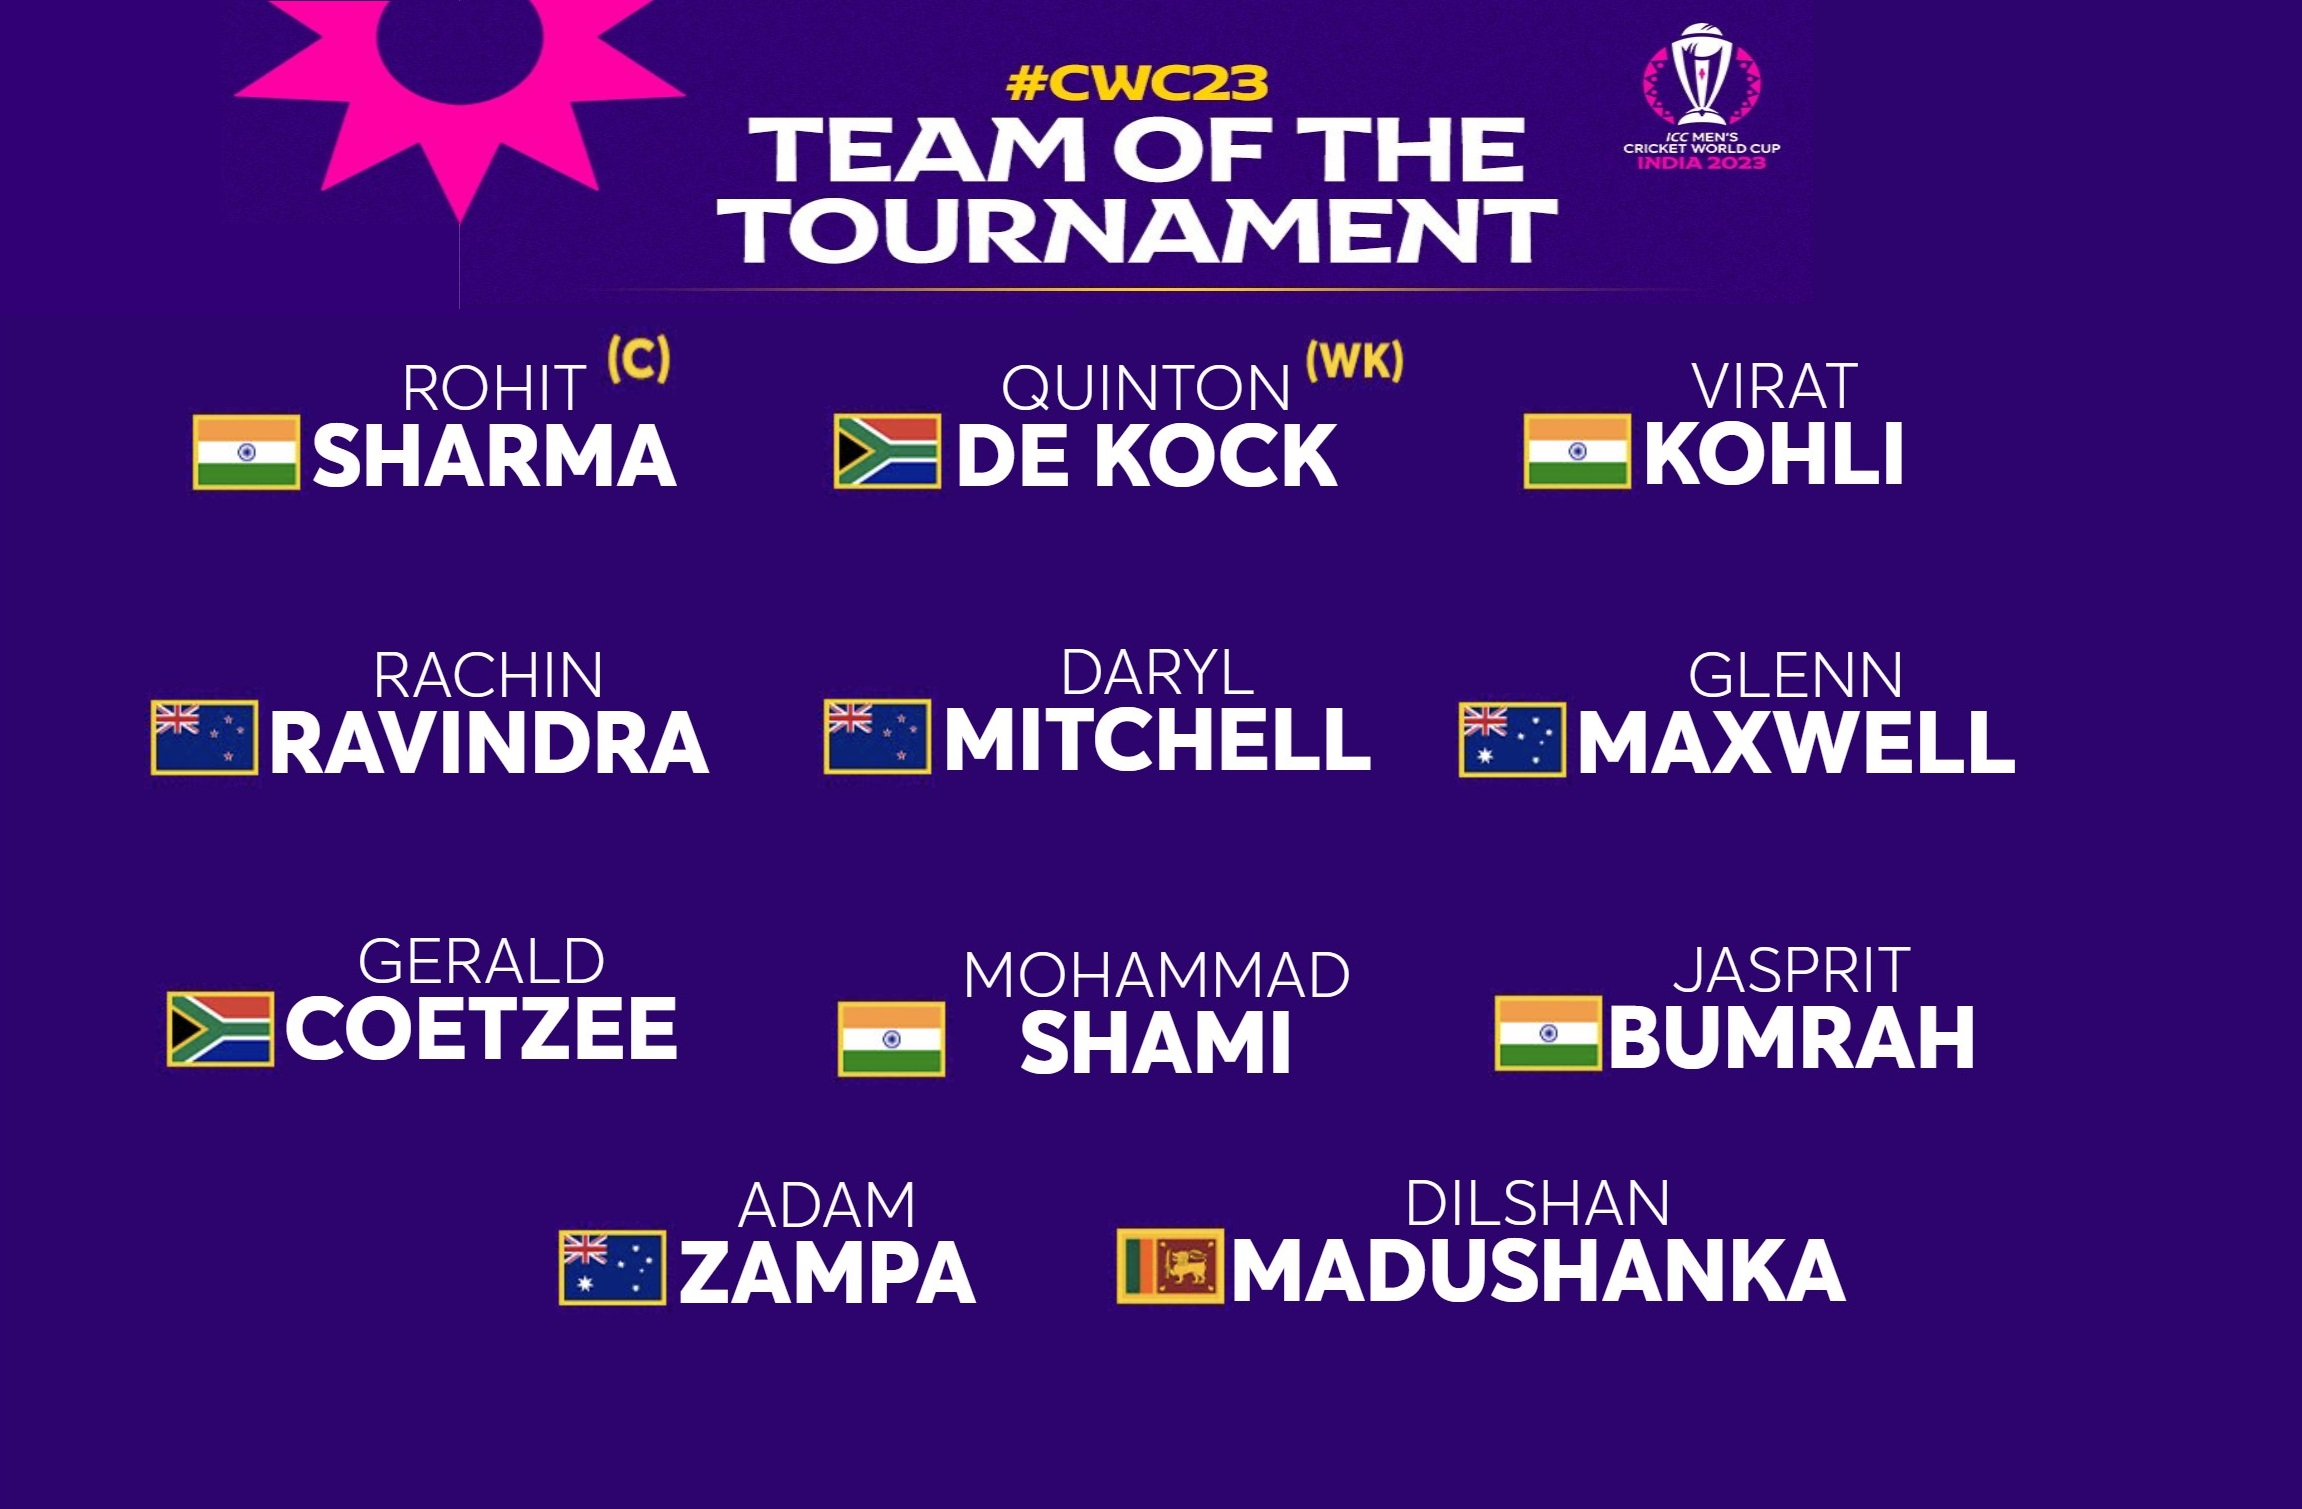

In [118]:
teams.head(6)

,Team 1,Team 2,Runs,Wkts,Overs,RR,Ground,Match Date
0,Australia,New Zealand,771,19,99.2,7.76,Dharamsala,2023-10-28
1,South Africa,Sri Lanka,754,15,94.5,7.95,Delhi,2023-10-07
2,India,New Zealand,724,14,98.5,7.32,Wankhede,2023-11-15
3,Pakistan,Sri Lanka,689,13,98.2,7.00,Hyderabad,2023-10-10
4,Australia,Pakistan,672,19,95.3,7.03,Bengaluru,2023-10-20
5,India,Netherlands,660,14,97.5,6.74,Bengaluru,2023-11-12


In [119]:
print('Total Matches Played:',teams.shape[0])

Total Matches Played: 48


In [120]:
print(' \n Venues Played At:',teams['Ground'].unique())

 
 Venues Played At: ['Dharamsala' 'Delhi' 'Wankhede' 'Hyderabad' 'Bengaluru' 'Pune'
 'Eden Gardens' 'Chennai' 'Ahmedabad' 'Lucknow']


In [121]:
print('Total venues played at:',teams['Ground'].nunique())

Total venues played at: 10


In [122]:
teams['avg runs']=teams['Runs']/2
teams['avg wkts']=teams['Wkts']/2

In [123]:
teams.head(5)

,Team 1,Team 2,Runs,Wkts,Overs,RR,Ground,Match Date,avg runs,avg wkts
0,Australia,New Zealand,771,19,99.2,7.76,Dharamsala,2023-10-28,385.5,9.5
1,South Africa,Sri Lanka,754,15,94.5,7.95,Delhi,2023-10-07,377.0,7.5
2,India,New Zealand,724,14,98.5,7.32,Wankhede,2023-11-15,362.0,7.0
3,Pakistan,Sri Lanka,689,13,98.2,7.00,Hyderabad,2023-10-10,344.5,6.5
4,Australia,Pakistan,672,19,95.3,7.03,Bengaluru,2023-10-20,336.0,9.5


In [124]:
team = teams.groupby('Ground').mean()
team.reset_index(drop=False, inplace=True)
team.head(5)

,Ground,Runs,Wkts,Overs,RR,avg runs,avg wkts
0,Ahmedabad,491.8,14.4,89.42,5.494,245.9,7.2
1,Bengaluru,518.4,13.4,79.42,6.396,259.2,6.7
2,Chennai,485.8,13.8,92.08,5.246,242.9,6.9
3,Delhi,569.6,16.0,86.22,6.588,284.8,8.0
4,Dharamsala,535.0,17.2,90.58,5.794,267.5,8.6


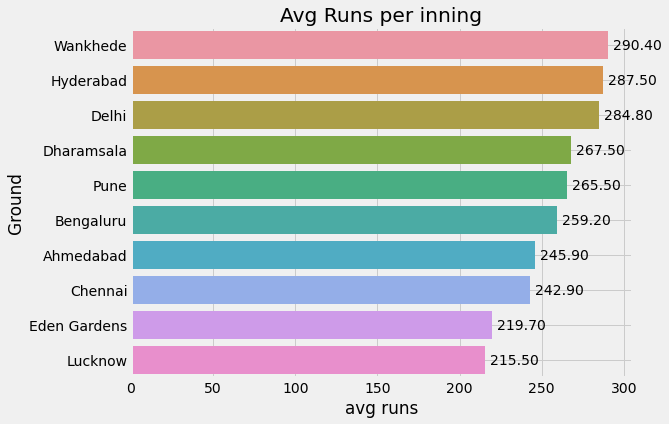

In [125]:
runs=team.sort_values('avg runs',ascending=False)
plt.figure(figsize =(8,6))
ax=sns.barplot(x="avg runs", y="Ground", data= runs)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title('Avg Runs per inning')
plt.grid(axis = 'y')
plt.show()

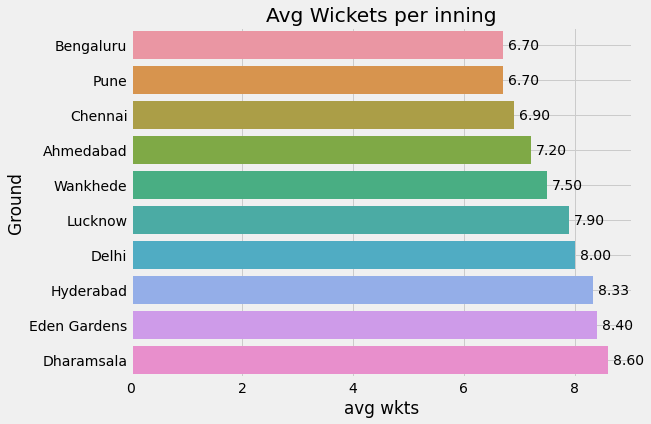

In [126]:
wkts=team.sort_values('avg wkts',ascending=True)
plt.figure(figsize =(8,6))
ax=sns.barplot(x="avg wkts", y="Ground", data= wkts)
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title('Avg Wickets per inning')
plt.grid(axis = 'y')
plt.show()